# MOT Laser Log

Calibrations, etc.

In [36]:
import numpy as np
from matplotlib.pyplot import *
style.use('dark_background') 
#lkjsdflkjsdf
import scipy.optimize as opt
import sys, os
sys.path.insert(1, os.path.join(sys.path[0], '../..'))
from fitters import linear

## MOT Offset lock vco calibration

In [25]:
# Volts
volt = [1,0,-1,-2,-3,-4,-5,-6,-7, -6.5, 0.5, 0.9, -0.5]
# Hz
freq = np.array([111.84, 143.76, 163.5, 182.82, 204.66, 229.440, 253.8, 277.740, 282.8, 282.88, 131.16, 115.2, 154.26]) * 1e6
# dBm (There was a 20dbm attenuator on the analyzer)
power = np.array([-20.2, -7.1, -6.88, -6.1, -5.85, -6.49, -6.4, -6.9, -6.8,-6.8, -7.66, -14.8, -6.64]) + 20


In [54]:
v_fit = volt[0:7] + volt[-3:-1]
freq_fit = np.concatenate((freq[0:7], freq[-3:-1]))

In [62]:
vals, cov = opt.curve_fit(linear.f, v_fit, freq_fit);
for val, name in zip(vals, linear.args()):
    print(name,'=',val)

Slope = -22783561.6206
Offset = 138789680.435


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


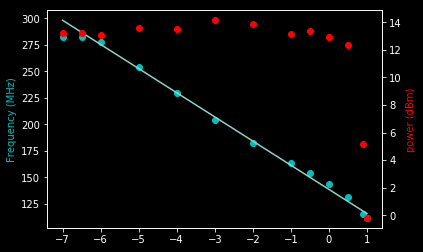

In [63]:
xpts = np.linspace(-7,1,1e3)
f, ax = subplots(1)
ax.plot(volt,freq*1e-6,'oc')
ax.plot(xpts, linear.f(xpts, *vals)*1e-6)
ax.set_ylabel('Frequency (MHz)', color='c')
ax2 = ax.twinx()
ax2.plot(volt,power,'ro')
ax2.set_ylabel('power (dBm)', color='r');